### 1. Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick


In [3]:
df = pd.read_csv("dataset.csv")
data = df.copy()
data.head()

,Job,Company,City,Work Type,Work Model,Salary,Experience Level,Skills
0,Manager Data et Analytics F/H,Deloitte,"Mechouar, Casablanca-Settat, Morocco (Hybrid)",Full-time,Hybrid,NaN,NaN,"Coaching, DWH, ETL, Esprit, Microsoft Business..."
1,Data Analyst Senior,Leyton,Casablanca Metropolitan Area (On-site),Full-time,On-site,NaN,Mid-Senior level,"CRM, Microsoft Excel, PowerPoint, Python, Sale..."
2,Data Engineer F/H,Zenika,Casablanca Metropolitan Area (Hybrid),Full-time,Hybrid,NaN,Mid-Senior level,"Apache Kafka, Apache Spark, Google Cloud Platf..."
3,Senior Data Scientist,Leyton,"Casablanca-Settat, Morocco (Hybrid)",Full-time,Hybrid,NaN,Associate,"Decision Trees, Linear Regression, Python, Sup..."
4,Backend Senior Developer H/F - Casablanca,Eskimoz,Casablanca Metropolitan Area (Hybrid),Full-time,Hybrid,NaN,Mid-Senior level,"PHP, الإنجليزية, الاتصالات ثنائية اللغة, التوا..."


### 2. Statistics

#### Number of jobs collected

In [4]:
nb_jobs = data.shape[0]
nb_jobs

257

#### Number of missing values

In [5]:
data.isna().sum()

Job                   0
Company               0
City                  0
Work Type             9
Work Model           29
Salary              257
Experience Level     70
Skills                8
dtype: int64

#### Top hiring Cities 

In [6]:
from collections import Counter

lst = []
for i in range(0,257):
        cities = data['City'][i].replace(',',' ').replace('-',' ').replace('Mechouar','Casablanca').replace('Prefecture','Casablanca').replace('Sidi','Sidi_Ifni').replace('Agdal','Rabat').replace('Dar','Casablanca').replace('Aîn','Casablanca').replace('Fès','Fez').split(' ')
        lst.append(cities[0])
        i+=1

count_cities = Counter(lst)
unique_cities = list(count_cities.items())
#plt.bar(unique_cities)
#unique_cities[0]
cnames = []
ccount = []
for j in range(0,11):
        city_name = unique_cities[j][0]
        city_count = unique_cities[j][1]
        cnames.append(city_name)
        ccount.append(city_count)
print(cnames)
print(ccount)

['Casablanca', 'Rabat', 'Fez', 'Morocco', 'Temara', 'Marrakesh', 'Tangier', 'Agadir', 'Sidi_Ifni', 'Dakhla', 'Meknes']
[156, 66, 4, 12, 1, 9, 5, 1, 1, 1, 1]


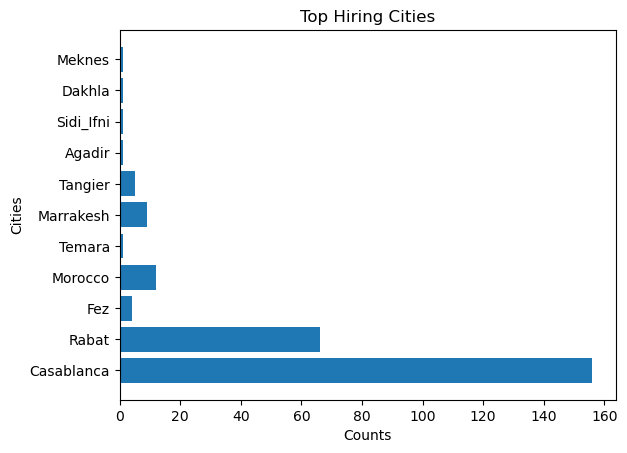

In [7]:
fig,ax = plt.subplots()
ax.barh(cnames, width=ccount)
plt.xlabel("Counts")
plt.ylabel("Cities")
plt.title("Top Hiring Cities")
plt.show()

<font color=sky-blue>Interpretation</font><br>
Casablanca and Rabat offer more jobs opportunities compared to other cities.

#### Most model work In demand(Full-time, Part-time etc)

In [203]:
#Replace some of work type with NaN
l = ["Mid-Senior level","Entry level","Associate","Director"]
data['Work Type']=data['Work Type'].replace(l, np.nan)
data['Work Type'].value_counts()

Work Type
Full-time     202
Internship      8
Part-time       6
Contract        4
Temporary       1
Name: count, dtype: int64

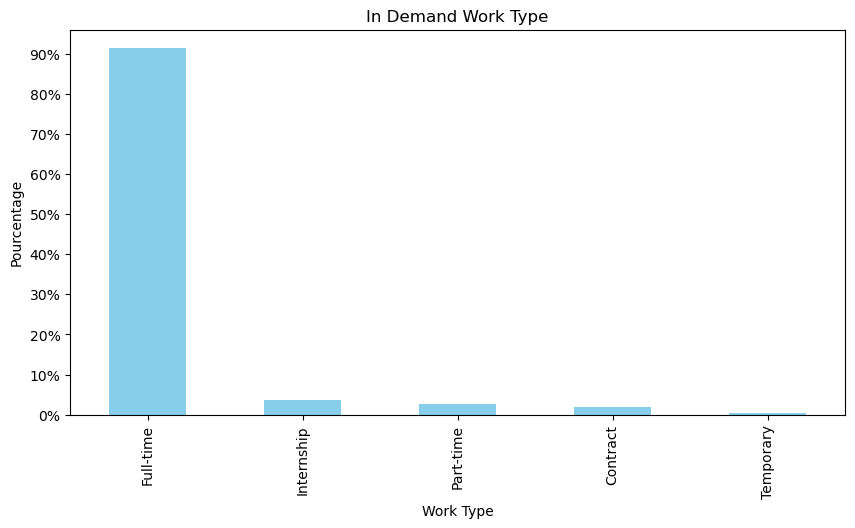

In [210]:
type_jobs = data['Work Type'].value_counts()
len_jobs = type_jobs.sum()
ax = type_jobs.plot(kind='bar', figsize=(10,5),  color='skyblue')
plt.xlabel("Work Type")
plt.ylabel("Pourcentage")
plt.title("In Demand Work Type")
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=len_jobs,decimals=None))
ax.yaxis.set_major_locator(mtick.MultipleLocator(base=0.1*len_jobs))
plt.show()

<font color=sky-blue>Interpretation</font><br>
Full-time jobs are high demand types of work.

#### Work Model(Remote, on-site, hybride)

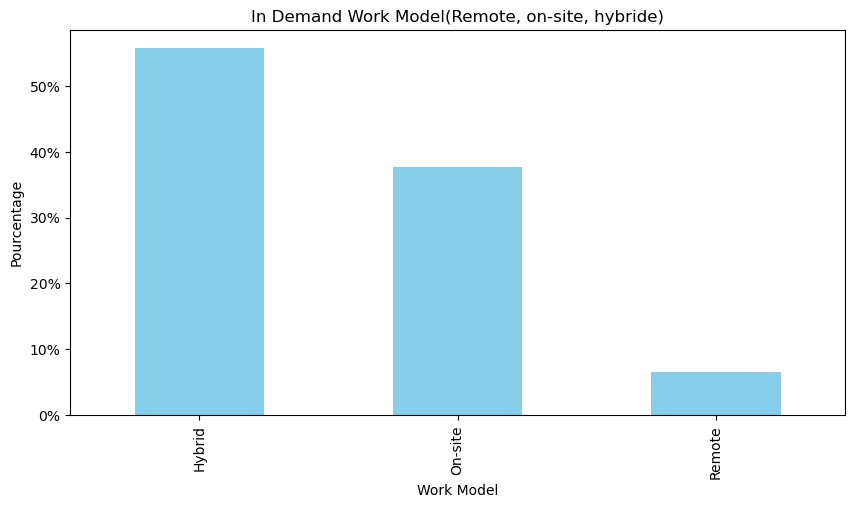

In [222]:
model_work = data['Work Model'].value_counts()
len_work_model = model_work.sum()
ax = model_work.plot(kind='bar', figsize=(10,5),  color='skyblue')
plt.xlabel("Work Model")
plt.ylabel("Pourcentage")
plt.title("In Demand Work Model(Remote, on-site, hybride)")
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=len_work_model,decimals=None))
ax.yaxis.set_major_locator(mtick.MultipleLocator(base=0.1*len_work_model))
plt.show()

<font color=sky-blue>Interpretation</font><br>
Hybride type of work is the most demanded in job markets.

#### Seniority Level(Mid-Senior level, Associate, Entry level etc)

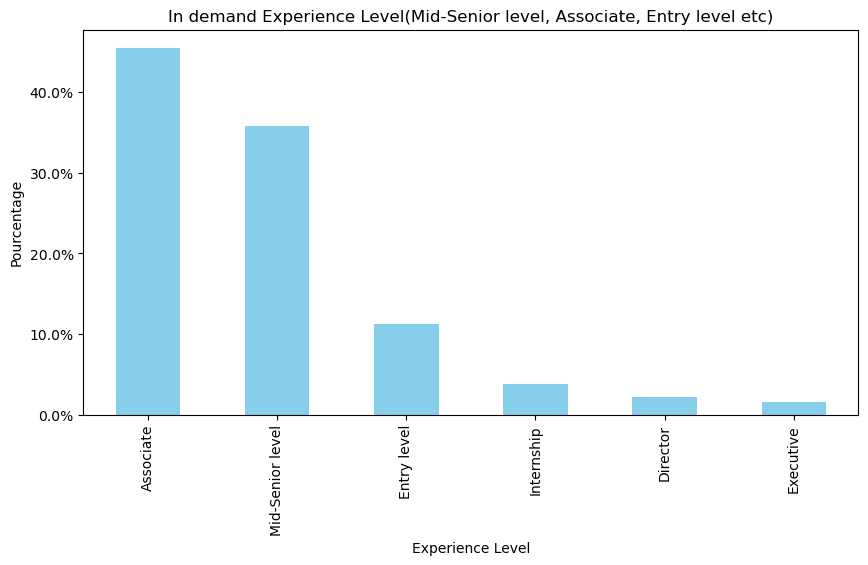

In [225]:
seniority = data['Experience Level'].value_counts()
len_seniority = seniority.sum()
ax = seniority.plot(kind='bar', figsize=(10,5),  color='skyblue')
plt.xlabel("Experience Level")
plt.ylabel("Pourcentage")
plt.title("In demand Experience Level(Mid-Senior level, Associate, Entry level etc)")
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=len_seniority,decimals=None))
ax.yaxis.set_major_locator(mtick.MultipleLocator(base=0.1*len_seniority))
plt.show()

<font color=sky-blue>Interpretation</font><br>
Associate work dominates other experience levels.

#### Companies most hiring

In [227]:
data['Company'].value_counts()

Company
CGI                                                  17
Deloitte                                             14
Orange Business Maroc                                12
SQLI                                                 10
Société Générale - Africa Technologies & Services    10
                                                     ..
BCG Platinion                                         1
JESA S.A                                              1
CREDIT DU MAROC                                       1
MAROCLEAR                                             1
Avito.ma - Frontier Digital Ventures                  1
Name: count, Length: 89, dtype: int64

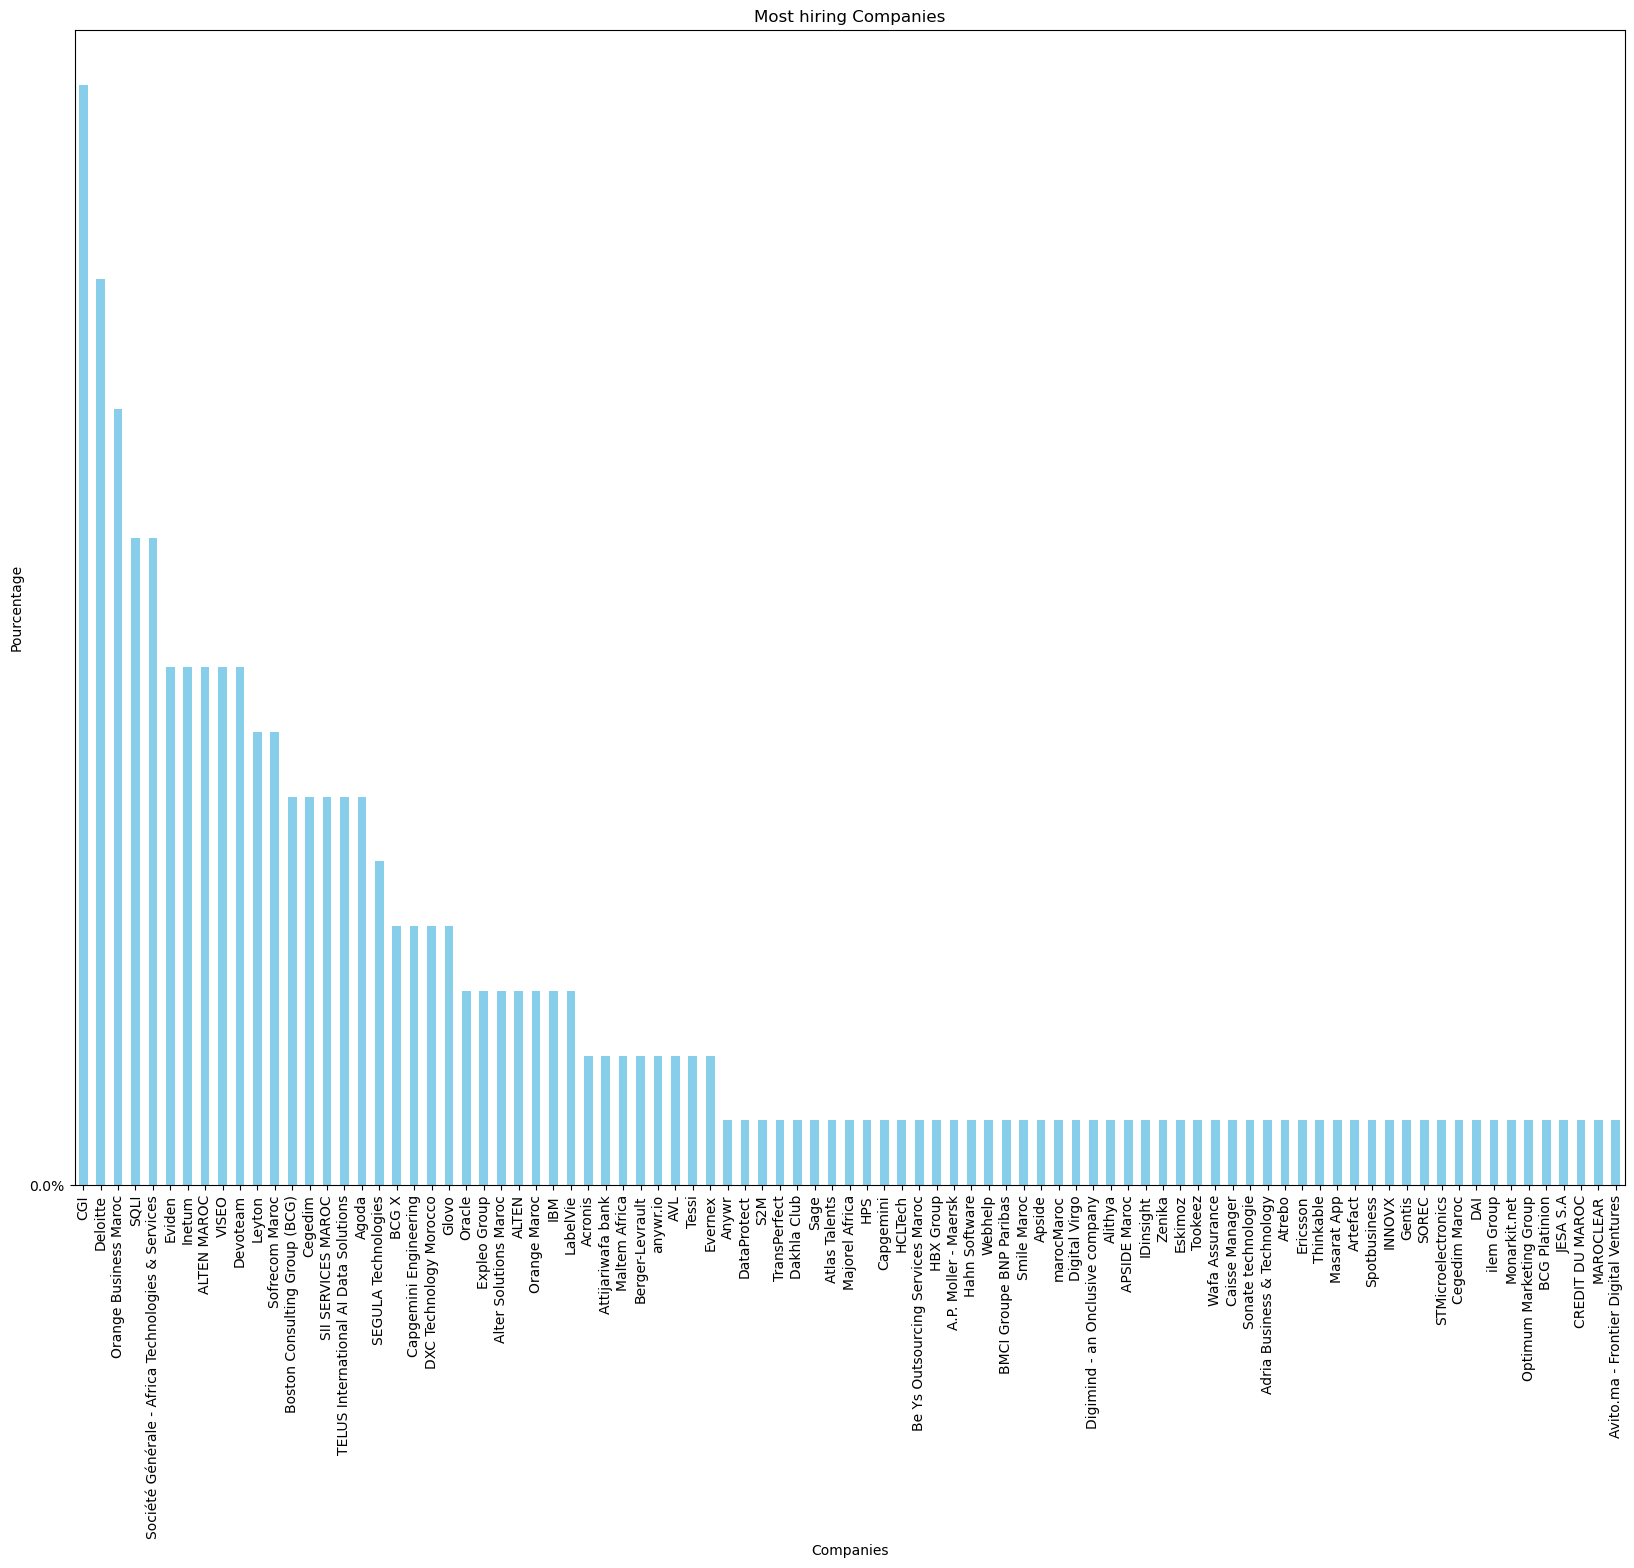

In [238]:
companies = data['Company'].value_counts()
len_companies = companies.sum()
ax = companies.plot(kind='bar', figsize=(20,15),  color='skyblue')
plt.xlabel("Companies")
plt.ylabel("Pourcentage")
plt.title("Most hiring Companies")
ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=len_companies,decimals=None))
ax.yaxis.set_major_locator(mtick.MultipleLocator(base=0.1*len_companies))
plt.show()

<font color=sky-blue>Interpretation</font><br>


#### In demand Programming langages 

In [ ]:
#using NLP to extract nouns(langages)

<font color=sky-blue>Interpretation</font><br>


#### Most Job titles in demand

<font color=sky-blue>Interpretation</font><br>


### 3. Preprocessing

#### Drop unecessary features

#### Drop missing values

#### Impute features instead of drop them all

#### Seperate jobs and create features for each job